## Problema 1

Se tiene un microprocesador de 5 bits con entrada analógica de -3.3 a 5 [V]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

$x(t) = 20 \sin(7t - \pi/2) - 3 \cos(5t) + 2 \cos(10t)$

Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.




Primero, definimos la señal $x(t) = 20 \sin(7t - \pi/2) - 3 \cos(5t) + 2 \cos(10t)$, donde se evalúa en un intervalo de tiempo que cubre dos períodos completos de la señal, tal como se pide en el enunciado.

Usamos el vector de tiempo tv con 100 puntos, y luego graficamos $x(t)$ para observar su comportamiento en el dominio del tiempo. Esta gráfica representa la señal original antes de cualquier proceso de acondicionamiento o cuantización.


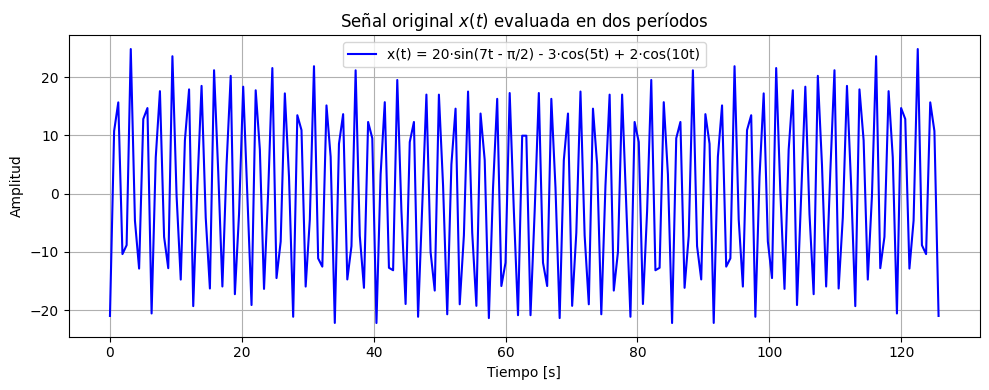

In [28]:
# Parámetros señal compuesta y muestreo
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#graficar con simpy

K = 200                 # Número de muestras deseadas
T_0 = 20 * np.pi        # Período fundamental: 20π es el período fundamental de la señal, es decir, el tiempo en el que todas las oscilaciones se repiten juntas.
ti = 0                  # Tiempo inicial
tf = 2 * T_0
F_0 = 1/T_0             # Frecuencia fundamental
Fs = 2*F_0        # Tiempo final para dos períodos

# Vector de tiempo con K muestras equiespaciadas
tv = np.linspace(ti, tf, K)

# Señal compuesta evaluada en tv
xv = 20 * np.sin(7 * tv - np.pi/2) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

plt.figure(figsize=(10, 4))
plt.plot(tv, xv, label='x(t) = 20·sin(7t - π/2) - 3·cos(5t) + 2·cos(10t)', color='blue')
plt.title('Señal original $x(t)$ evaluada en dos períodos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Se aplica cero y pendiente para poder obtener la señal acondicionada, para posteriormente cuantizarla. Se hace un proceso de escalado y desplazamiento (cero y pendiente) a la señal $x(t)$, con el objetivo de ajustarla al rango de voltajes que puede manejar el ADC.  Al final, obtenemos la señal acondicionada que estará lista para ser cuantizada.

In [29]:
def my_ceropen(x,ymin = -5, ymax = 5): # funcion cero y pendiente
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv


In [30]:
from scipy.spatial.distance import cdist

# Acondicionamiento de la señal: escalarla al rango del ADC
y_min_adc = -3.3
y_max_adc = 5

ycs = my_ceropen(xv, ymin=y_min_adc, ymax=y_max_adc)  # ycs es la señal acondicionada

# Número de bits del ADC y definición del vector de niveles de cuantización
nbits = 5
rmin = y_min_adc
rmax = y_max_adc

# Crear niveles de cuantización equiespaciados
ve = np.linspace(rmin, rmax, 2**nbits)  # 32 niveles para 5 bits

# Calcular las distancias euclidianas entre cada muestra acondicionada y los niveles de cuantización
d = cdist(ycs.reshape(-1, 1), ve.reshape(-1, 1))


# Verifica la forma de yv (señal acondicionada)
print(f"Forma de la señal acondicionada: {ycs.shape}")

Forma de la señal acondicionada: (200,)


Aplicamos la cuantización punto a punto a la señal acondicionada ycs.  
Para esto, se implementa una función que evalúa punto a punto y construye la señal digital cuantizada.

In [31]:
# Función de cuantización punto a punto
def my_cuantizador(yn, vq):
    dn = cdist(yn.reshape(-1,1), vq.reshape(-1,1))
    ind = np.argmin(dn)
    return vq[ind]

# Aplicar cuantizador a toda la señal acondicionada
yq = np.array([my_cuantizador(np.array([val]), ve) for val in ycs])

Luego, graficamos:

- La señal acondicionada continua (`ycs`) en color rojo.  
- La señal acondicionada discreta (`ycs`) usando `stem` para mostrar los puntos de muestreo.  
- Los niveles de cuantización (`ve`) como líneas horizontales para visualizar los estados posibles.  
- La señal digital cuantizada (`yq`) en amarillo con marcadores para mostrar la señal final digital.

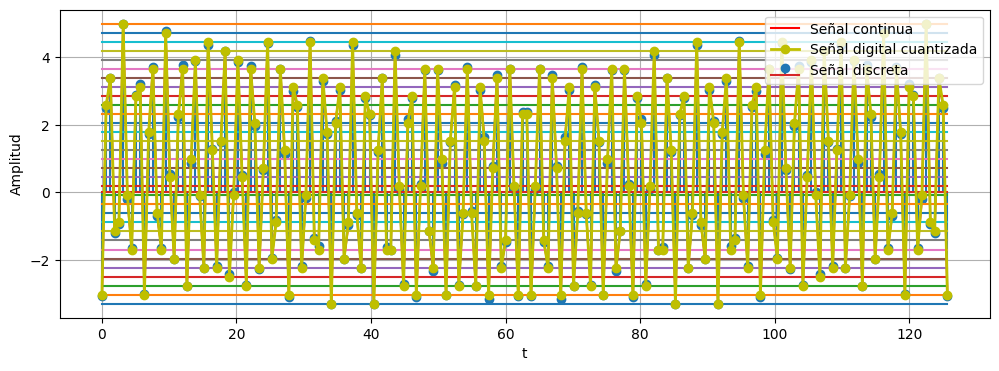

In [32]:
plt.figure(figsize=(12, 4))  # Más ancho, menos alto

plt.plot(tv, ycs, c='r', label='Señal continua')  # señal continua
plt.stem(tv, ycs, label='Señal discreta')     # señal discreta

# estados de cuantización
for v in ve:
    plt.plot(tv, v*np.ones(len(tv)))

# señal digital cuantizada (discreta + cuantizada)
plt.plot(tv, yq, c='y', marker='o', label='Señal digital cuantizada', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()


## Problema 2
¿Cuál es la señal obtenida en tiempo discreto al utilizar un conversor analógico digital con frecuencia de muestreo de $ 5 \, \text{kHz} $, aplicado a la señal


$
x(t) = 3 \cos(1000 \pi t) + 5 \sin(2000 \pi t) + 10 \cos(11000 \pi t)
$

Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


Primero, definimos la funcion original y la graficamos.

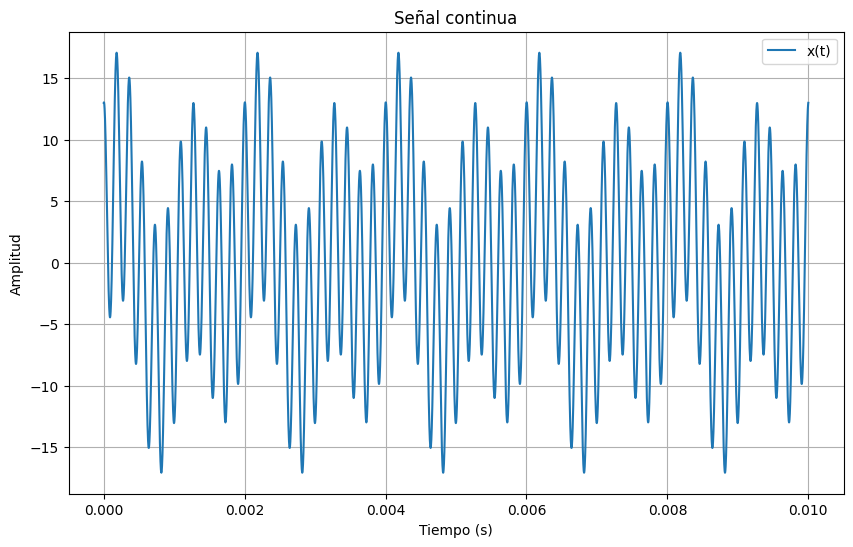

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


# Señal original:
t = np.linspace(0, 0.01, 10000) # rango de tiempo para evaluar la señal
xt = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Graficar la señal x(t) continua
plt.figure(figsize=(10, 6))
plt.plot(t, xt, label='x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel("Amplitud")
plt.title('Señal continua')
plt.legend()
plt.grid(True)
plt.show()

A continuacion implementamos el proceso de cero y pendiente a nuestra funcion

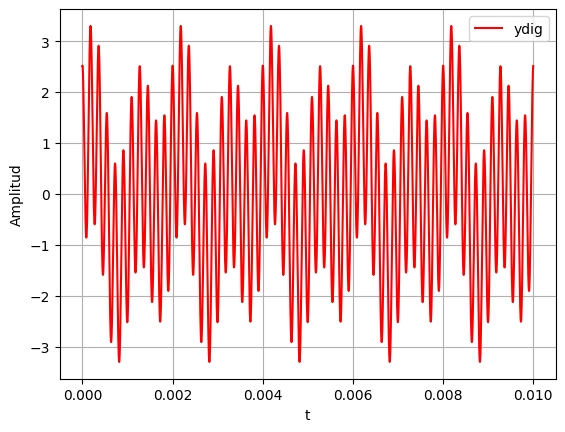

In [34]:
#cero y pendiente
ycs = my_ceropen(xt, ymin=-3.3,ymax=3.3)

# Parámetros, número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # rango de tiempo para evaluar la señal

dn = cdist(ycs.reshape(-1,1),ve.reshape(-1,1))
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(dn,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila ind

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


plt.plot(t,ycs,c='r',label='ydig')

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Función que permite muestrear la señal continua y representar gráficamente sus valores discretos en función del tiempo.

In [35]:
def mg(fs, duracion=0.01, titulo=''):
    # Funcion que muestra y grafica la señal x(t) con la frecuencia de muestreo fs.

    Ts = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, Ts)  # Vector de tiempo

    # Señal x(t)
    x_t = 0.3*np.cos(1000*np.pi*t - np.pi/4) + 0.6*np.sin(2000*np.pi*t) + 0.1*np.cos(11000*np.pi*t - np.pi)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()


vamos a muestrear nuestra funcion a 5kHz tal como lo pide el ejercicio

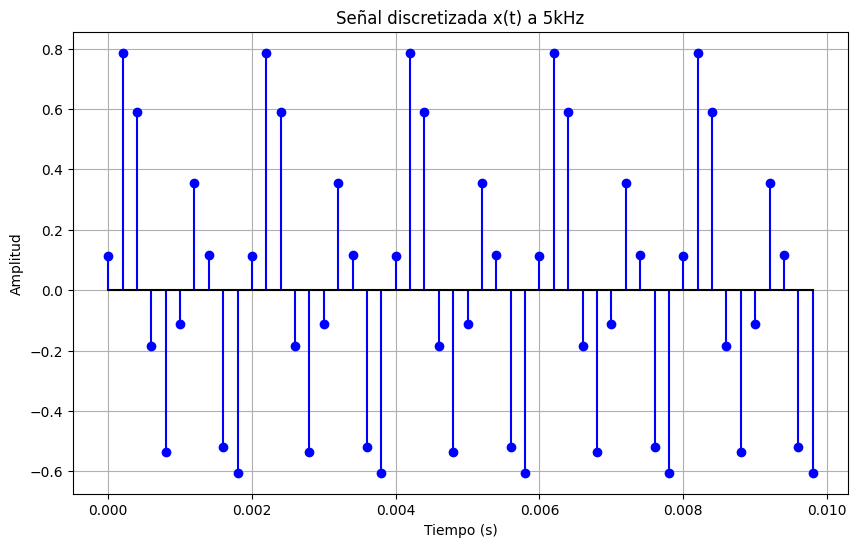

In [36]:
    mg(5000, titulo='Señal discretizada x(t) a 5kHz') #señal con Fs de 5kHz

De acuerdo con el teorema de Nyquist, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal, para evitar aliasing. En este caso, la frecuencia de muestreo proporcionada (5kHz) no es adecuada, ya que es menor que Fmax

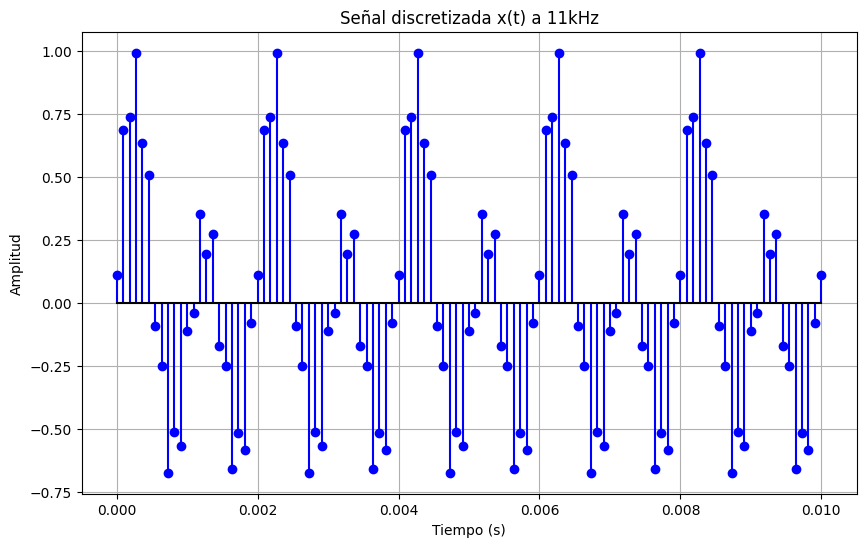

In [37]:
mg(11000, titulo='Señal discretizada x(t) a 11kHz')

## Problema 3:

La distancia media entre dos señales $ x_1(t) $ y $ x_2(t) $ se puede expresar a partir de la potencia media como:

$$
d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x_1(t) - x_2(t)|^2 \, dt
$$

Se tienen las señales:

$$
x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T}, \quad A, T > 0
$$

$$
x_2(t) =
\begin{cases}
1 & 0 \le t < \frac{T}{4} \\
-1 & \frac{T}{4} \le t < \frac{3T}{4} \\
1 & \frac{3T}{4} \le t < T
\end{cases}
$$

¿Cual es la distancia media entre las señales? Corrobore sus desarrollos con Sympy.


Código con sympy para verificar:

El procedimiento manual se adjuntara en pdf junto con el parcial en el correo.

In [38]:
import sympy as sp

# Definir variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
omega_0 = 2 * sp.pi / T

# Definir las funciones por tramos para x2(t)
# Usaremos integrales por partes para cada tramo

# Expresiones de (x1(t) - x2(t))^2 en cada tramo
f1 = (A * sp.cos(omega_0 * t) - 1)**2
f2 = (A * sp.cos(omega_0 * t) + 1)**2
f3 = f1  # Igual que f1

# Definir los límites de integración
lim1_start, lim1_end = 0, T/4
lim2_start, lim2_end = T/4, 3*T/4
lim3_start, lim3_end = 3*T/4, T

# Calcular las integrales
I1 = sp.integrate(f1, (t, lim1_start, lim1_end))
I2 = sp.integrate(f2, (t, lim2_start, lim2_end))
I3 = sp.integrate(f3, (t, lim3_start, lim3_end))

# Sumar las integrales y dividir entre T para la distancia media
d = (I1 + I2 + I3) / T

# Simplificar el resultado
d_simplified = sp.simplify(d)

print("Distancia media d(x1, x2):")
sp.pprint(d_simplified)


Distancia media d(x1, x2):
 2          
A    4⋅A    
── - ─── + 1
2     π     


## Problema 4:


Sea $x''(t)$ la segunda derivada de la señal $ x(t) $, donde $ t \in [t_i, t_f] $. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$$
c_n = \frac{1}{(t_i - t_f) n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} dt, \quad n \in \mathbb{Z}
$$

¿De qué manera se pueden calcular los coeficientes $ a_n $ y $ b_n $ desde $ x''(t) $ en la serie trigonométrica de Fourier?

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $ n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\} $, a partir de $ x''(t) $ para la señal $ x(t) $ mostrada en la Figura 1. Compreuebe el espectro obtenido con la estimación a partir de $ x(t) $ y presente las respectivas simulaciones en Python.


Se define la señal $x(t)$ por tramos y un vector de tiempo. Se crean las bases exponenciales para los armónicos y se calculan los coeficientes $c_n$ por integración numérica. Luego, se reconstruye la señal con estos coeficientes y se grafican la señal original y su aproximación para comparar.

Se define nuestra señal y se calculan sus coeficientes de Fourier por dos métodos: directo y usando la segunda derivada. Luego se reconstruye la señal con varios armónicos y se comparan las aproximaciones con la señal original.

<ipython-input-47-f18e5ca23e90>:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  suma += (1 / T) * np.trapz(x, t)
<ipython-input-47-f18e5ca23e90>:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  cn = (2 / T) * np.trapz(integrando, t)
<ipython-input-47-f18e5ca23e90>:71: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  suma += (1 / T) * np.trapz(x, t)


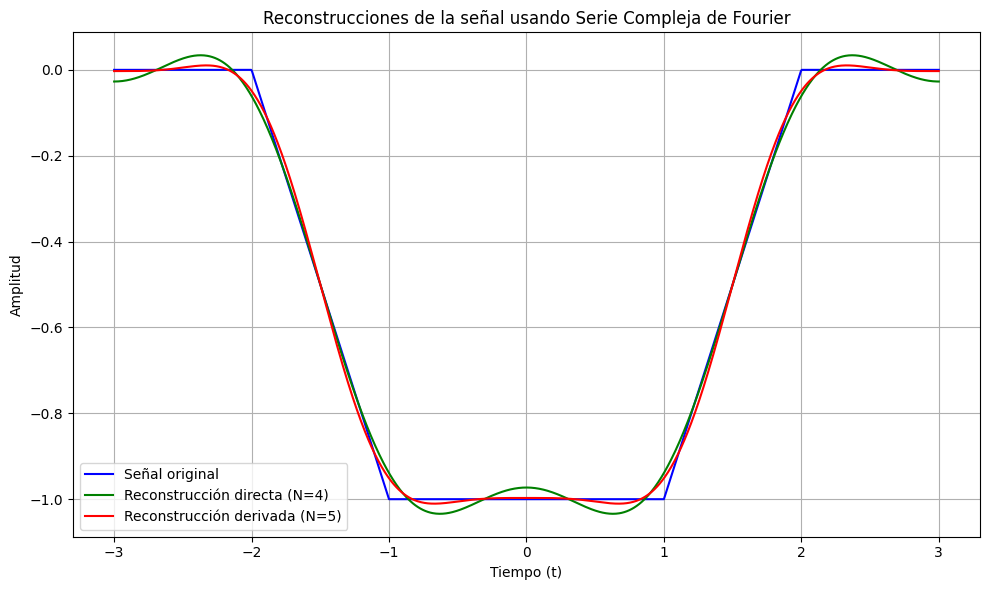

In [47]:
import numpy as np
import matplotlib.pyplot as plt

"""
Reconstrucción de una señal periódica mediante series de Fourier compleja.
Este script:
- Define una señal trapezoidal por tramos (piecewise).
- Calcula sus coeficientes de Fourier por dos métodos:
   1) Directamente mediante integración numérica.
   2) Usando los coeficientes obtenidos a partir de la segunda derivada analítica.
- Realiza la reconstrucción aproximada usando un número finito de términos.
"""

# === Parámetros del sistema ===
d1 = 1    # Inicio de la rampa ascendente (izquierda)
d2 = 2    # Fin de la rampa descendente (derecha)
A = 1     # Altura máxima de la señal
T = 6     # Período total de la señal

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 1000)  # Vector de tiempo centrado en cero

# === Definición de la señal trapezoidal piecewise ===
m2 = A / (d2 - d1)  # Pendiente de las rampas
m1 = -m2            # Pendiente negativa

x = np.piecewise(t,
                  [
                      ((t >= -T/2) & (t < -d2)),
                      ((t >= -d2) & (t <= -d1)),
                      ((t > -d1) & (t <= d1)),
                      ((t > d1) & (t <= d2)),
                      ((t > d2) & (t <= T/2))
                  ],
                  [
                      0,
                      lambda t: m1 * t + d2 * m1,
                      -A,
                      lambda t: m2 * t + d2 * m1,
                      0
                  ])

# Arreglos para reconstrucción
re1 = np.zeros(1000, dtype=complex)  # Reconstrucción directa
re2 = np.zeros(1000, dtype=complex)  # Reconstrucción con derivada

# === Función reconstrucción directa ===
def recos1(ti, N, T):
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapz(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            suma += (1 / T) * np.trapz(x, t)
    return suma

# === Función reconstrucción con coeficientes de la segunda derivada ===
def recos2(ti, N, T, d1, d2, A):
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            numerador = 4 * (A / (d2 - d1)) * (np.cos(d1 * i * omega) - np.cos(d2 * i * omega))
            denominador = T * (i ** 2) * (omega ** 2)
            cn = numerador / denominador
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            suma += (1 / T) * np.trapz(x, t)
    return suma

# === Reconstrucción punto a punto ===
for i in range(1000):
    re1[i] = recos1(t[i], 4, T)       # Reconstrucción directa (5 términos: 0 a 4)
    re2[i] = recos2(t[i], 5, T, d1, d2, -A)  # Reconstrucción derivada (6 términos: 0 a 5)

# === Gráfica de resultados ===
plt.figure(figsize=(10, 6))
plt.plot(t, x, color='blue', label='Señal original')
plt.plot(t, re1.real, color='green', label='Reconstrucción directa (N=4)')
plt.plot(t, re2.real, color='red', label='Reconstrucción derivada (N=5)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Calculamos el espectro de magnitud de la señal usando los coeficientes de Fourier obtenidos con la fórmula basada en la segunda derivada. Se grafica la magnitud de los coeficientes para los armónicos desde -5 hasta 5.

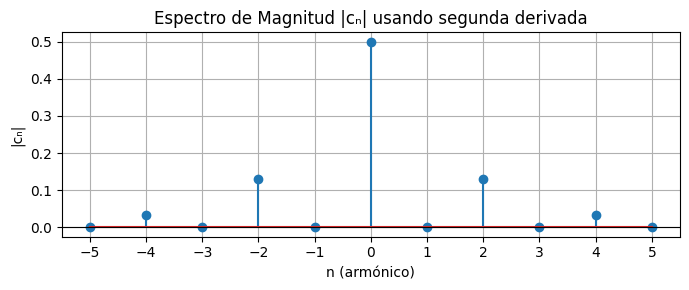

In [49]:
# Cálculo del espectro

# Término constante c0
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
nv = np.arange(-N_max, N_max + 1)  # Vector de armónicos

omega0 = (2 * np.pi) / T  # Frecuencia angular fundamental

# Coeficientes Cn usando fórmula con segunda derivada
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * (nv[non_zero_mask]**2) * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Valor para n=0
Cn[nv == 0] = c0

# Graficar espectro de magnitud
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(nv)
plt.tight_layout()
plt.show()

Se grafican la parte real y la parte imaginaria de los coeficientes de Fourier $C_n$ calculados con la fórmula basada en la segunda derivada, para los armónicos desde -5 hasta 5.

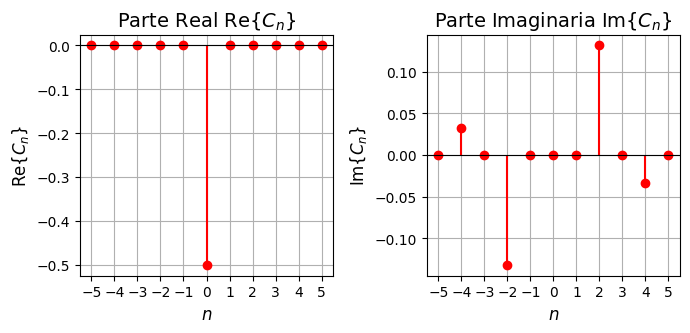

In [50]:
# Graficar espectro: Parte real e imaginaria

fig = plt.figure(figsize=(7, 6))

# Parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv, np.real(Cn), 'r', basefmt=" ")
ax1.set_title(r'Parte Real $\mathrm{Re}\{C_n\}$', fontsize=14)
ax1.set_xlabel(r'$n$', fontsize=12)
ax1.set_ylabel(r'$\mathrm{Re}\{C_n\}$', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.8)
ax1.set_xticks(nv)

# Parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv, np.imag(Cn), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria $\mathrm{Im}\{C_n\}$', fontsize=14)
ax2.set_xlabel(r'$n$', fontsize=12)
ax2.set_ylabel(r'$\mathrm{Im}\{C_n\}$', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='black', lw=0.8)
ax2.set_xticks(nv)

fig.tight_layout()
plt.show()

Se grafican la magnitud y la fase de los coeficientes de Fourier $ c_n $ calculados a partir de la segunda derivada, para los armónicos $ n $ entre -5 y 5.

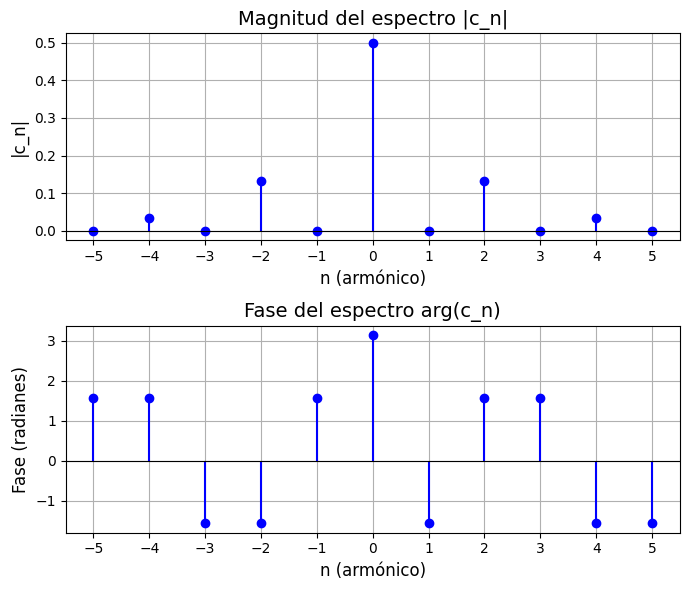

In [51]:
# Graficar magnitud y fase del espectro

fig = plt.figure(figsize=(7, 6))

# Magnitud
ax1 = fig.add_subplot(2, 1, 1)
ax1.stem(nv, np.abs(Cn), 'b', basefmt=" ")
ax1.set_title('Magnitud del espectro |c_n|', fontsize=14)
ax1.set_xlabel('n (armónico)', fontsize=12)
ax1.set_ylabel('|c_n|', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.8)
ax1.set_xticks(nv)

# Fase
ax2 = fig.add_subplot(2, 1, 2)
ax2.stem(nv, np.angle(Cn), 'b', basefmt=" ")
ax2.set_title('Fase del espectro arg(c_n)', fontsize=14)
ax2.set_xlabel('n (armónico)', fontsize=12)
ax2.set_ylabel('Fase (radianes)', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='black', lw=0.8)
ax2.set_xticks(nv)

fig.tight_layout()
plt.show()